# AI Art Detector: Distinguishing AI-Generated vs Human-Created Ukiyo-e Art


## 1. Data Collection and Loading

### 1.1 Dataset Loading

Dataset Statistics:
Total images: 2475
Human images: 1167
AI images: 1308

Image Dimensions Statistics:

Human Images:
Width  - Mean: 1691, Min: 1381, Max: 6273
Height - Mean: 1856, Min: 1381, Max: 5839

AI Images:
Width  - Mean: 768, Min: 768, Max: 768
Height - Mean: 768, Min: 768, Max: 768


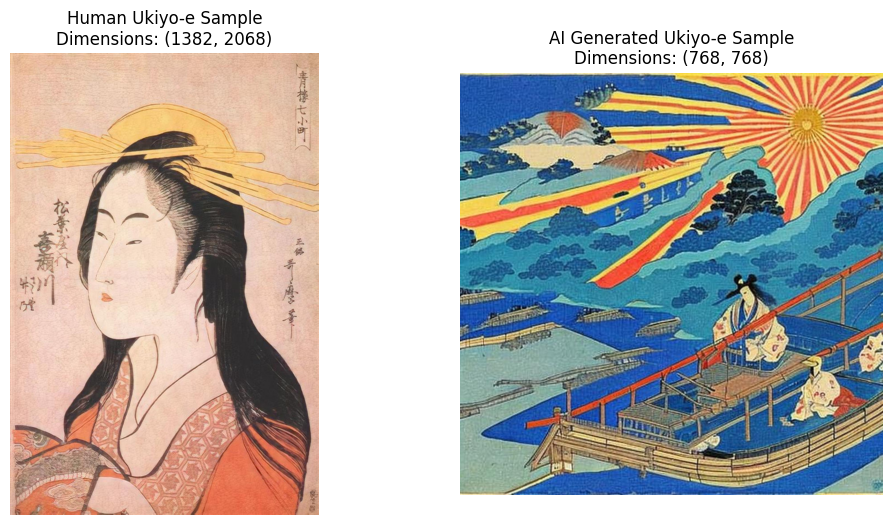

In [4]:
# Import dataset locally
from data_preprocessing.loader import load_ukiyo_e_dataset
df = load_ukiyo_e_dataset()

### 1.2 Dataset Information

In [5]:
from data_preprocessing.standarize import get_image_metadata, get_dataset_statistics, print_dataset_summary

get_dataset_statistics(df)


{'total_images': 2475, 'ai_generated': 1308, 'human_created': 1167}

In [6]:
print_dataset_summary(df)

=== Dataset Summary ===

Total Images: 2475
AI Generated: 1308
Human Created: 1167

Dataset Statistics:
             width       height
count  2475.000000  2475.000000
mean   1203.103434  1281.133737
std     570.304059   668.094891
min     768.000000   768.000000
25%     768.000000   768.000000
50%     768.000000   768.000000
75%    1382.000000  1918.500000
max    6273.000000  5839.000000


## 2. Data Exploration

### 2.1 Basic Dataset Statistics/Analysis

In [7]:
from data_preprocessing.analyze import load_or_process_dataset, analyze_dataset, plot_size_distribution, plot_brightness_analysis, plot_sample_color_distributions, generate_summary_report
#df = analyze_dataset(data_dir="data")
df = load_or_process_dataset(force_reprocess=False)
print("\nDataset Overview:")
print(f"Total number of images: {len(df)}")
print(f"Number of AI images: {len(df[df['label'] == 'AI'])}")
print(f"Number of Human images: {len(df[df['label'] == 'Human'])}")

Loading cached dataset...
Loaded 2475 samples from cache

Dataset Overview:
Total number of images: 2475
Number of AI images: 1308
Number of Human images: 1167


### 2.2 Color Analysis (Saturation)

In [8]:
import os
os.makedirs('outputs', exist_ok=True)
print("\nAnalyzing color distributions...")
plot_sample_color_distributions(df)


Analyzing color distributions...


### 2.3 Brightness Analysis

In [9]:
print("\nAnalyzing brightness characteristics...")
plot_brightness_analysis(df)


Analyzing brightness characteristics...


### 2.4 Size Distributions

In [10]:
print("\nAnalyzing image size distributions...")
#plot_size_distribution(df)


Analyzing image size distributions...


### 2.5 Generate and display summary report

In [11]:
print("\nGenerating summary report...")
summary = generate_summary_report(df)
print(summary)
from data_preprocessing.analyze import analyze_features
analyze_features(df)
df.to_csv('outputs/dataset_metadata.csv', index=False)
print("\nAnalysis results saved to 'outputs' directory")





Generating summary report...

    Ukiyo-e Dataset Analysis Summary

    Dataset Composition:
    ------------------
    Total Images: 2475
    AI-generated: 1308
    Human-created: 1167

    Color Characteristics:
    -------------------
    RGB Means:
        AI     - R: 128.6, G: 127.6, B: 111.4
        Human  - R: 161.3, G: 147.6, B: 127.9
    
    Color Ratios:
        AI     - R: 0.350, G: 0.347, B: 0.303
        Human  - R: 0.371, G: 0.337, B: 0.292

    Texture and Line Features:
    -----------------------
    Edge Density:
        AI     - Mean: 0.122, Std: 0.032
        Human  - Mean: 0.097, Std: 0.054
    
    Line Statistics:
        AI     - Count: 2305.6, Density: 0.0039
        Human  - Count: 9942.9, Density: 0.0033

    Contrast Analysis:
    ---------------
    Michelson Contrast:
        AI     - Mean: 3873091.014, Std: 31093694.442
        Human  - Mean: 24445600.409, Std: 74708716.970
    
    RMS Contrast:
        AI     - Mean: 0.443, Std: 0.078
        Human  -

/Users/karen/PAML Final project/PAML_AI_Art_Detector/.venv/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:586: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)



Top 10 most distinguishing features:
                   feature        ai_mean    human_mean     difference  \
32                 entropy  248930.356915  1.053982e+06  805051.302300   
35              line_count    2305.605505  9.942854e+03    7637.248823   
14         saturation_mean     105.337371  7.242125e+01      32.916120   
21   saturation_quartile_3     140.862385  9.204627e+01      48.816113   
4                 red_mean     128.639306  1.612920e+02      32.652686   
22               hue_bin_0       0.314270  5.834894e-01       0.269219   
19       saturation_median      98.133410  6.332391e+01      34.809502   
46  local_contrast_3x3_std      33.626947  2.214036e+01      11.486583   
20   saturation_quartile_1      67.295107  4.467009e+01      22.625013   
25               hue_bin_3       0.167418  3.910809e-02       0.128310   

          p_value  effect_size  
32   0.000000e+00     3.418834  
35  1.335424e-294     1.703777  
14  2.496442e-242     1.503892  
21  2.640820e-2

## 3. Data Preprocessing


### 3.1 Image Standardization

### 3.2 Feature Extraction

In [12]:



cache_path = 'outputs/processed_features.csv'
os.makedirs('outputs', exist_ok=True)

#print("Saving processed dataset to cache...")
#df.to_csv(cache_path, index=False)

print(f"Saved {len(df)} samples to {cache_path}")
#df = load_or_process_dataset(force_reprocess=False)
#only keep the top features
top_features = [
            'entropy',
            'line_count',
            'saturation_mean',
            'saturation_quartile_3',
            'red_mean',
            'hue_bin_0',
            'saturation_median',
            'local_contrast_3x3_std',
            'saturation_quartile_1',
            'hue_bin_3',
            'label',  # Keep the label column
            'path'    # Keep the path column for reference
        ]

df = df[top_features]
print(df.head())




Saved 2475 samples to outputs/processed_features.csv
         entropy  line_count  saturation_mean  saturation_quartile_3  \
0  215169.160035      2602.0        99.521856                  153.0   
1  254019.636532      2345.0       110.371982                  135.0   
2  196690.205887      2914.0       113.020121                  167.0   
3  256181.859299      1365.0       102.943629                  142.0   
4  235513.339564      1920.0       110.748781                  156.0   

     red_mean  hue_bin_0  saturation_median  local_contrast_3x3_std  \
0  127.029017   0.282754               77.0               38.011258   
1  111.750520   0.202545              102.0               28.196544   
2  148.819463   0.357001              101.0               48.037960   
3  117.537884   0.240323               99.0               38.518299   
4  140.988469   0.352948               99.0               37.923674   

   saturation_quartile_1  hue_bin_3 label  \
0                   55.0   0.047797    AI 

## 4. Model Implementation

### 4.1 Logisic Regression

In [19]:
from model.logistic import LogisticRegression
from model.logistic import train_and_evaluate_model
import matplotlib.pyplot as plt
import seaborn as sns



### 4.2 CNN

In [14]:
from model.cnn import CNN

## 5. Model Training and Evaluation

### 5.1 Logistic Regression Training Pipeline

In [21]:

# Train and evaluate the model with your dataframe
print("hi")
model, (X_train, X_test, y_train, y_test) = train_and_evaluate_model(df)

Training set size: 1732
Test set size: 743

Training model...
Cost after iteration 0: 0.667519
Cost after iteration 100: 0.294316
Cost after iteration 200: 0.199507
Cost after iteration 300: 0.155732
Cost after iteration 400: 0.129961
Cost after iteration 500: 0.112725
Cost after iteration 600: 0.100259
Cost after iteration 700: 0.090752
Cost after iteration 800: 0.083221
Cost after iteration 900: 0.077082

Making predictions...

Accuracy: 0.9919

Classification Report:
              precision    recall  f1-score   support

       Human       1.00      0.98      0.99       350
          AI       0.98      1.00      0.99       393

    accuracy                           0.99       743
   macro avg       0.99      0.99      0.99       743
weighted avg       0.99      0.99      0.99       743


Confusion Matrix:
[[344   6]
 [  0 393]]

Feature Importance:
entropy: 1.0559
line_count: 0.8485
local_contrast_3x3_std: 0.6068
hue_bin_0: 0.5533
hue_bin_3: 0.5085
red_mean: 0.4421
saturation_quart

### 5.2 Logistic Regression Evaluation Pipeline


Model Performance Summary:
Training set size: 1732 samples
Test set size: 743 samples


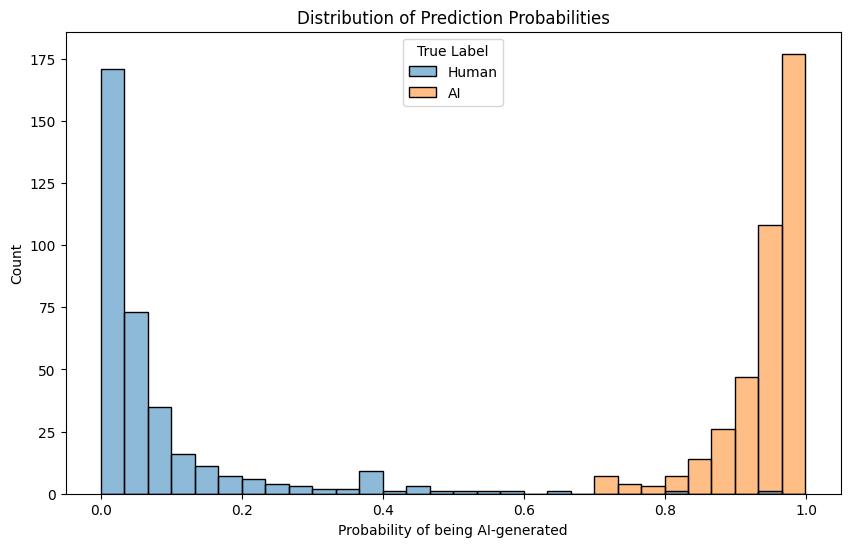

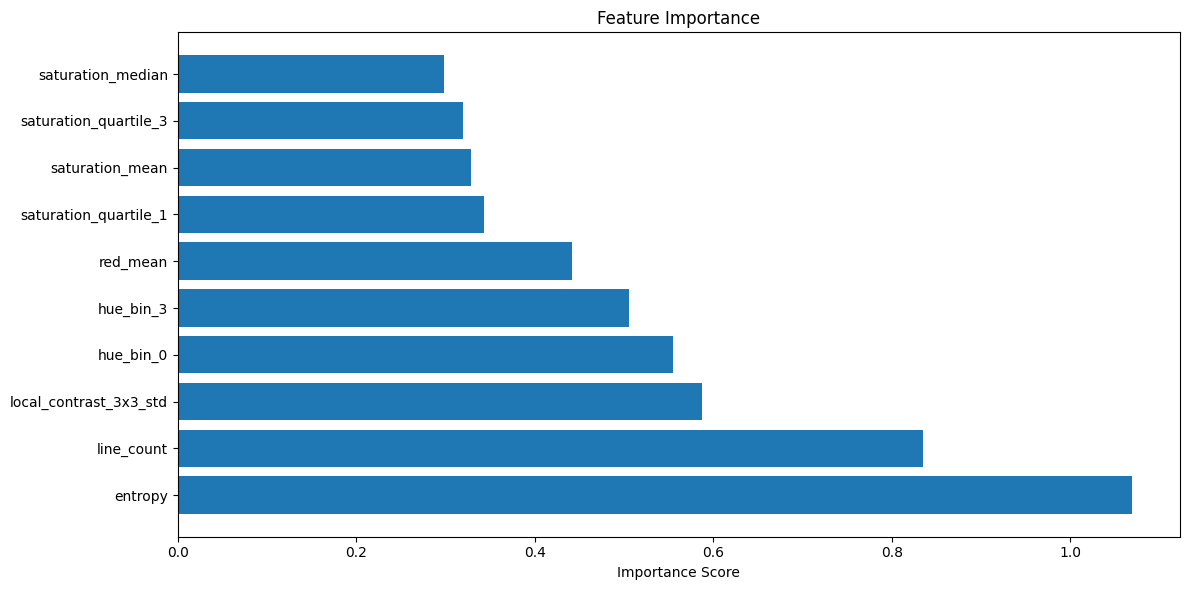

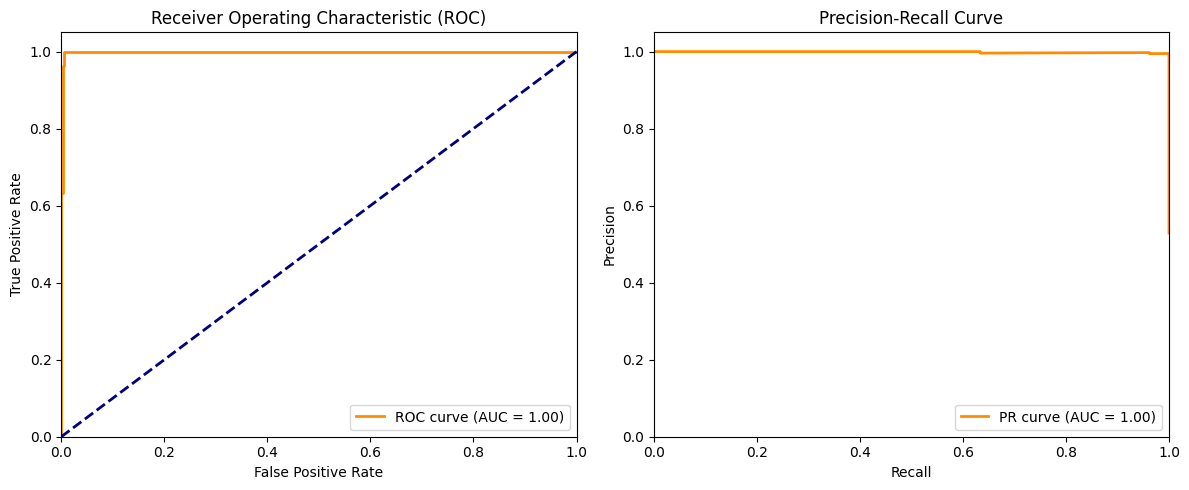


Performance at different thresholds:
Threshold  |  Accuracy  | Precision  |   Recall   |     F1    
--------------------------------------------------
   0.30    |   0.968    |   0.942    |   1.000    |   0.970   
   0.40    |   0.985    |   0.973    |   1.000    |   0.986   
   0.50    |   0.992    |   0.985    |   1.000    |   0.992   
   0.60    |   0.996    |   0.992    |   1.000    |   0.996   
   0.70    |   0.997    |   0.995    |   1.000    |   0.997   


In [18]:
from model.evaluate_logistic import evaluate_model

evaluate_model(model, X_train, X_test, y_train, y_test)

### 5.3 CNN Evaluation Pipeline

### 5.4 CNN Evaluation Pipeline

## 6. Results and Visualization


## 7. Model Export for Streamlit
